# **Analyzing the Morphology of Labeled Components**
### *Created by Preksha Shah* 
### **Overview**
This lab focuses on extracting and analyzing morphological properties of labeled components in an image. It provides insights such as perimeter, centroid, bounding box, eccentricity, and orientation. This is particularly useful in earth science for tasks like analyzing rock formations, detecting craters, or identifying landmass features in satellite imagery.

## **Key Concepts**
1. **Otsu's Thresholding:** Automatically determines an optimal threshold to separate foreground and background.
2. **Connected Component Labeling:** Assigns unique labels to connected regions in a binary image.
3. **Morphological Properties:** Properties like area, perimeter, eccentricity, and bounding boxes provide geometric and spatial insights.
4. **Regionprops:** A function from skimage.measure that computes various properties of labeled regions.

---

##**1. Import Necessary Libraries**

In [1]:
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label
from skimage.io import imread
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage import morphology
from matplotlib.patches import Rectangle
import numpy as np


##**2. Load and Preprocess the Image**

In [2]:
# Load the image as grayscale (Earth science example: satellite image or geological feature)
image_path = r"/content/rocks.jpg"
image = imread(image_path, as_gray=True)  # Load as grayscale
binary_image = image > threshold_otsu(image)  # Apply Otsu's thresholding


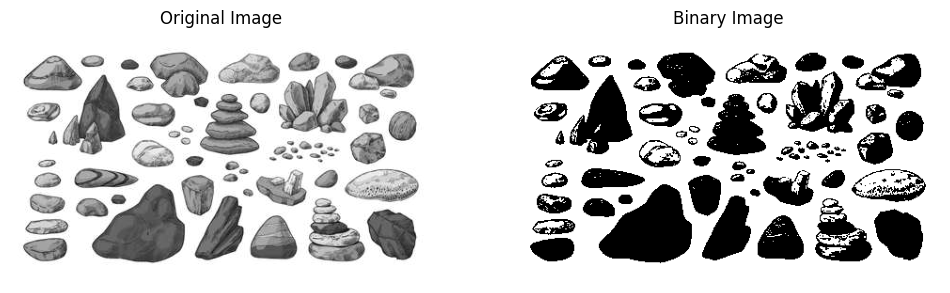

In [3]:
# Visualize the original and binary images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title("Binary Image")
ax[1].axis('off')

plt.show()

##**3. Label Connected Components**

In [4]:
# Label connected components in the binary image
labeled_image = label(binary_image)
props = regionprops(labeled_image)

In [5]:
# Convert labeled image to a colored version for better visualization
labeled_image_colored = label2rgb(labeled_image, bg_label=0)


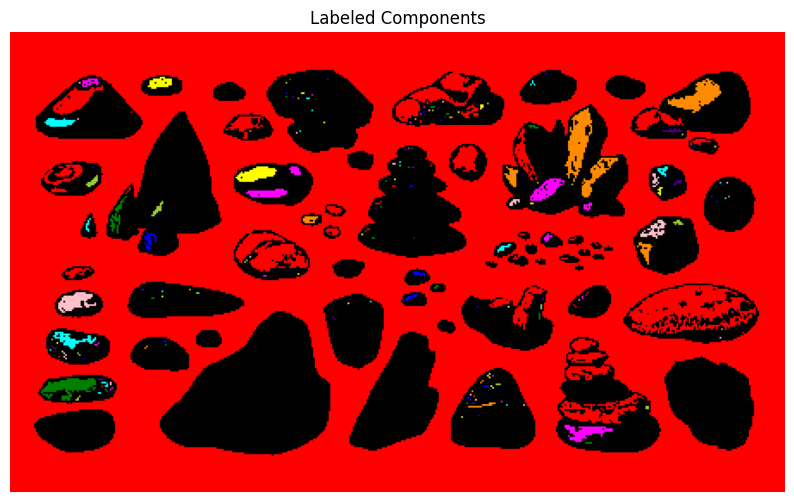

In [6]:
# Visualize the labeled components
plt.figure(figsize=(10, 6))
plt.imshow(labeled_image_colored)
plt.title("Labeled Components")
plt.axis('off')
plt.show()

##**4. Morphological Analysis**
###**A. Perimeter and Area**

In [7]:
def draw_perimeter_with_area(ax, region):
    # Draw perimeter as red dots
    coords = region.coords
    boundary_image = np.zeros(labeled_image.shape, dtype=bool)
    for coord in coords:
        boundary_image[coord[0], coord[1]] = True

    # Extract perimeter
    perimeter_image = morphology.binary_dilation(boundary_image) ^ boundary_image
    perimeter_coords = np.argwhere(perimeter_image)
    for coord in perimeter_coords:
        ax.plot(coord[1], coord[0], 'r.', markersize=1)

    # Display area
    cy, cx = region.centroid
    ax.text(cx, cy, f"Area: {region.area}", color='white', fontsize=8, ha='center',
            bbox=dict(facecolor='black', alpha=0.6))


###**B. Centroids**

In [8]:
def draw_centroid(ax, region):
    # Mark centroids with blue dots
    cy, cx = region.centroid
    ax.plot(cx, cy, 'bo', markersize=10)  # Blue dot
    ax.text(cx, cy + 5, f"Centroid: ({cy:.1f}, {cx:.1f})", color='white', fontsize=8, ha='center',
            bbox=dict(facecolor='black', alpha=0.6))


###**C. Bounding Boxes**

In [9]:
def draw_bounding_box(ax, region):
    # Draw bounding boxes around components
    minr, minc, maxr, maxc = region.bbox
    rect = Rectangle((minc, minr), maxc - minc, maxr - minr,
                     edgecolor='yellow', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    cx, cy = (minc + maxc) / 2, (minr + maxr) / 2
    ax.text(cx, cy, f"BBox: {region.bbox}", color='white', fontsize=8, ha='center',
            bbox=dict(facecolor='black', alpha=0.6))


###**D. Eccentricity**

In [10]:
def draw_eccentricity(ax, region):
    cy, cx = region.centroid
    eccentricity = region.eccentricity
    ax.text(cx, cy, f"Ecc: {eccentricity:.2f}", color='purple', fontsize=8, ha='center',
            bbox=dict(facecolor='white', alpha=0.6))


###**E. Orientation**

In [11]:
def draw_orientation(ax, region):
    y0, x0 = region.centroid
    orientation = region.orientation
    x1 = x0 + 0.5 * region.major_axis_length * np.cos(orientation)
    y1 = y0 - 0.5 * region.major_axis_length * np.sin(orientation)
    x2 = x0 - 0.5 * region.major_axis_length * np.cos(orientation)
    y2 = y0 + 0.5 * region.major_axis_length * np.sin(orientation)

    # Draw orientation lines
    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2)  # Major axis
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2)  # Minor axis
    ax.text(x0, y0, f"Orientation: {np.degrees(orientation):.2f}°", color='white', fontsize=8, ha='center',
            bbox=dict(facecolor='black', alpha=0.6))


###**5. Visualization Function**

In [12]:
def visualize_property(title, draw_function):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(labeled_image_colored)
    for region in props:
        draw_function(ax, region)
    plt.title(title)
    plt.axis('off')
    plt.show()


###**6. Run Morphological Analysis**

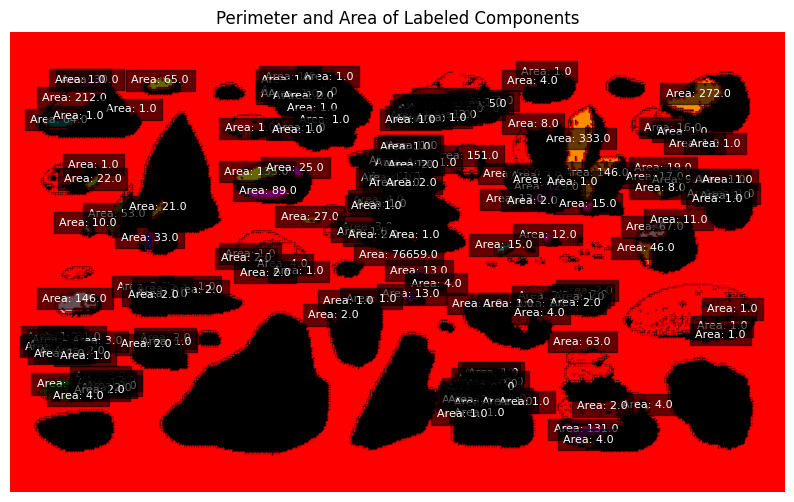

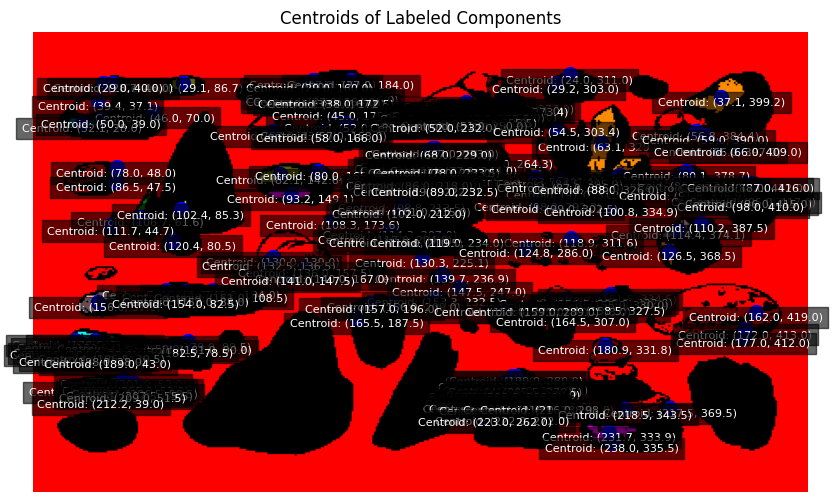

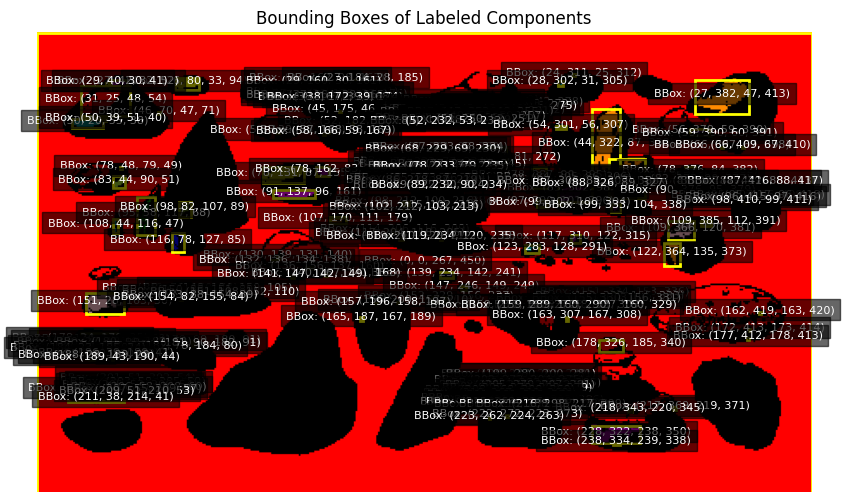

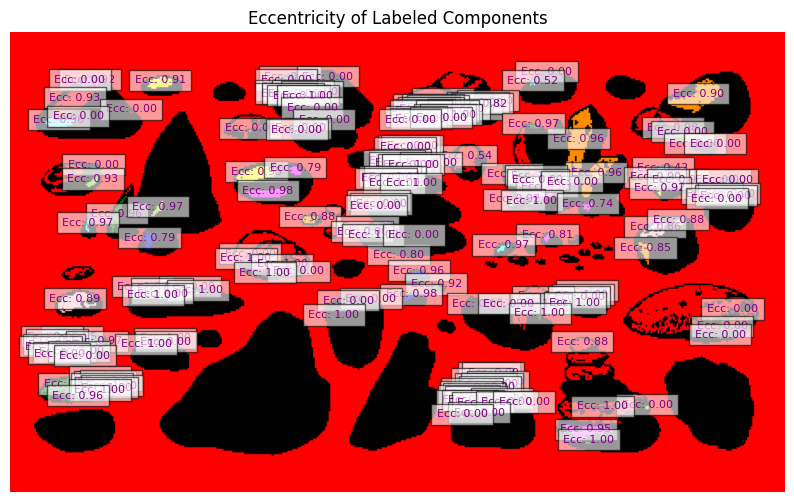

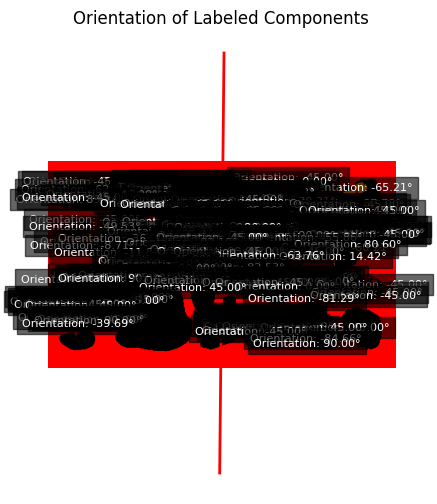

In [13]:
visualize_property("Perimeter and Area of Labeled Components", draw_perimeter_with_area)
visualize_property("Centroids of Labeled Components", draw_centroid)
visualize_property("Bounding Boxes of Labeled Components", draw_bounding_box)
visualize_property("Eccentricity of Labeled Components", draw_eccentricity)
visualize_property("Orientation of Labeled Components", draw_orientation)


##**Applications in Earth Science**
- **Geological Mapping:** Identifying rock formations and tectonic features.
- **Land Use Analysis:** Classifying forests, urban areas, and water bodies.
- **Glacier and River Studies:** Analyzing flow patterns and sediment transport.
- **Disaster Monitoring:** Measuring affected zones post-floods or landslides.
- **Soil Erosion Studies:** Monitoring desertification and erosion trends.

##**Conclusion**
This exercise showcased how image morphology analysis helps extract shape, size, and orientation information from labeled components. These techniques are invaluable for earth science applications like mapping, monitoring environmental changes, and studying natural processes. Efficient tools like Python and skimage enable scalable and automated analysis, supporting critical research and decision-making.

---